# Unit 5 - Financial Planning

In [25]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_sec_key = os.getenv("ALPACA_SEC_KEY")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [11]:
btc_json = btc_url + "?format=json"

btc_object = requests.get(btc_json)

In [12]:
btc_response = btc_object.content
type(btc_response)

bytes

In [13]:
import json
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18711056,
            "total_supply": 18711056,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 47870.0,
                    "volume_24h": 63957123607,
                    "market_cap": 895705029894,
                    "percentage_change_1h": -1.11618159342733,
                    "percentage_change_24h": -4.12097935422038,
                    "percentage_change_7d": -16.5462815838365,
                    "percent_change_1h": -1.11618159342733,
                    "percent_change_24h": -4.12097935422038,
                    "percent_change_7d": -16.5462815838365
                },
                "CAD": {
                    "price": 57965.783,
                    "volume_24h": 77445680975.7163,
                    

In [14]:
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)

47870.0


In [15]:
my_btc_value = my_btc* btc_price
print(my_btc_value)

57444.0


In [24]:
# Fetch current BTC price
btc_json = btc_url + "?format=json"

# Fetch current ETH price
eth_json = eth_url + "?format=json"

# Compute current value of my crpto

my_btc_value = my_btc* btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57331.20
The current value of your 5.3 ETH is $19858.94


In [16]:
eth_json = eth_url + "?format=json"

eth_object = requests.get(eth_json)
eth_object

<Response [200]>

In [17]:
eth_response = eth_object.content
type(eth_response)

bytes

In [18]:
import json
eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115889610,
            "total_supply": 115889610,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3751.96,
                    "volume_24h": 57898769735,
                    "market_cap": 438911282382,
                    "percentage_change_1h": -1.59394551632501,
                    "percentage_change_24h": -8.55831303961379,
                    "percentage_change_7d": 7.39725312950214,
                    "percent_change_1h": -1.59394551632501,
                    "percent_change_24h": -8.55831303961379,
                    "percent_change_7d": 7.39725312950214
                },
                "CAD": {
                    "price": 4543.248364,
                    "volume_24h": 70109620272.1115,
                 

In [19]:
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

3751.96

In [20]:
my_eth_value = my_eth* eth_price
print(my_eth_value)

19885.388


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [88]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [87]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_sec_key = os.getenv("ALPACA_SEC_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_sec_key, api_version="v2")


In [82]:
# Format current date as ISO format
today = pd.Timestamp("2020-05-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset( tickers, timeframe, start=today, end=today, limit = 1000).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high    low   close    volume    open   
time                                                                         
2020-05-15 00:00:00-04:00  117.04  117.09  116.9  117.03  11003154  282.37   

                                                              
                             high     low   close     volume  
time                                                          
2020-05-15 00:00:00-04:00  286.33  281.34  286.26  182152976

In [65]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
                        
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.03
Current SPY closing price: $286.26


In [67]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14313.00
The current value of your 200 AGG shares is $23406.00


### Savings Health Analysis

In [68]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value

total_shares_value = my_agg_value + my_spy_value

data = {'amount':[total_crypto, total_shares_value]} 


# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,77329.388
shares,37719.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

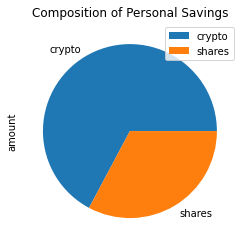

In [69]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [77]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulation you have enough Money!")
elif total_savings == emergency_fund:
    print("Congratulation you reached your Financial Goal!!!")
elif total_savings < emergency_fund:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratulation you have enough Money!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [91]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()


In [92]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

tickers = ["AGG","SPY"]
timeframe = "1D"

df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.95  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.43  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.26  366.2800  47917103

In [109]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use limit=1000 to call the most recent 1000 days of data
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [111]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [112]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997450,0.999355,0.997937,1.002192,0.996185,0.997954,0.996164,1.000371,1.000718,1.004366,...,0.994830,1.000313,0.998931,1.005141,1.000422,0.992841,0.997064,0.996437,1.000010,0.992114
2,0.998862,1.006424,0.994133,1.005111,0.989393,1.005245,0.997392,1.003861,0.994019,1.004710,...,0.994914,1.001358,1.001382,1.006084,1.010596,0.994851,0.994695,0.997078,1.001023,0.996882
3,1.008300,1.009431,0.998064,1.000048,0.986842,1.008864,0.994145,0.999410,0.982888,1.001427,...,0.997340,1.009047,1.000398,1.009138,1.009130,0.993719,0.988698,0.999230,1.008310,0.999329
4,1.011985,1.016892,1.006269,0.990994,0.997381,1.010717,0.994301,0.998394,0.978807,1.007355,...,0.998354,1.010107,1.007458,1.010427,1.007847,0.996745,0.982676,1.008710,1.004764,0.990192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,136.113310,172.659996,106.862147,140.717269,81.371255,137.175240,130.240829,138.086564,93.016936,227.519727,...,138.056898,119.880932,110.152919,450.961862,151.588959,132.733854,69.509153,229.786479,80.765136,117.160597
7557,136.309782,172.939330,107.537494,140.573568,81.258398,137.791863,130.679177,138.160533,92.987798,227.408707,...,138.721576,119.345362,110.972154,453.973146,152.385790,132.746560,70.035979,233.241362,81.088282,117.775973
7558,136.836826,171.789503,107.583417,140.718735,80.389031,138.975678,130.945688,138.665381,92.758869,229.104654,...,138.399466,118.977768,110.834151,451.475777,151.461015,133.850477,70.102252,236.173212,81.861162,118.594312
7559,136.140732,173.026526,106.942241,141.467765,80.166207,137.714527,131.456754,139.409089,93.249835,228.890899,...,137.324674,118.474045,111.704144,451.096748,150.643327,132.990548,70.181268,235.984978,81.596758,118.539429


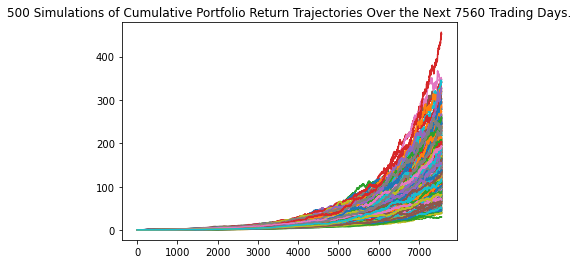

In [113]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

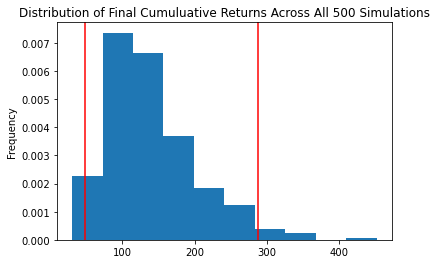

In [114]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [115]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean            140.492306
std              62.279841
min              30.774837
25%              95.857493
50%             129.825100
75%             170.329781
max             451.531512
95% CI Lower     49.044981
95% CI Upper    287.963746
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [116]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(even_tbl[8]*20000,2)
ci_lower = round(even_tbl[9]*2000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $575927.49 and $980899.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [117]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [118]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007990,1.001286,1.005530,1.002794,1.000793,0.997619,1.001970,1.002457,1.001589,0.995809,...,1.001682,0.993811,0.994158,0.999448,1.009209,0.994509,0.998239,1.001773,1.007289,1.008448
2,1.012906,1.006914,1.001013,0.997515,1.002294,0.995638,0.997345,1.005747,1.002999,0.989741,...,1.006054,0.995085,0.989146,1.007827,1.008603,0.998022,0.992115,1.011063,1.001688,0.998363
3,1.009440,1.004750,1.014154,0.997417,1.000099,0.992616,1.000247,0.999514,1.004660,0.991687,...,1.016298,0.999489,0.988476,1.001364,1.007139,1.004842,0.999382,1.015095,1.003941,0.989034
4,1.011794,1.002859,1.012603,0.995049,1.004519,0.986297,0.998892,1.001891,1.009547,0.989201,...,1.021461,0.992947,0.990277,0.990527,1.016396,1.001103,1.004498,1.020083,1.012444,0.996128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.881912,2.542052,2.504946,1.835733,1.472774,2.394930,2.234738,2.911976,2.035780,2.257774,...,2.419124,1.742207,1.887919,2.374397,2.411520,1.865944,2.980549,1.993489,2.241106,1.983092
1257,1.867998,2.548335,2.523291,1.841630,1.476645,2.392326,2.235464,2.885569,2.042928,2.278844,...,2.424428,1.747361,1.895721,2.352303,2.420487,1.873005,2.985010,1.986253,2.262208,1.979364
1258,1.859503,2.549894,2.538405,1.847033,1.482442,2.381781,2.213285,2.872328,2.042958,2.276438,...,2.418833,1.761834,1.890806,2.337760,2.431888,1.873159,2.995392,1.982423,2.261855,1.978865
1259,1.854094,2.547573,2.549409,1.833787,1.488830,2.392258,2.211758,2.907365,2.052204,2.276475,...,2.422521,1.778165,1.893197,2.341696,2.437260,1.876566,3.006158,1.980689,2.264635,1.978667


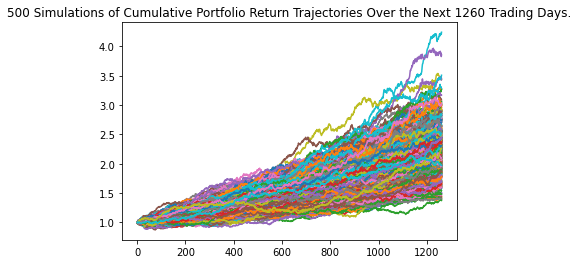

In [119]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

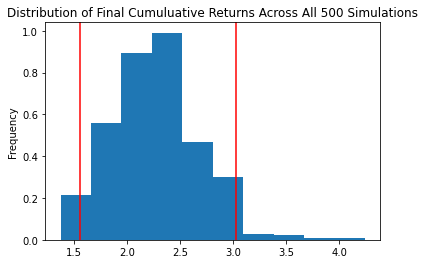

In [120]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [121]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              2.266297
std               0.403990
min               1.374607
25%               1.983532
50%               2.256121
75%               2.501449
max               4.240561
95% CI Lower      1.558219
95% CI Upper      3.026960
Name: 1260, dtype: float64


In [123]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $93493.15 and $181617.6


### Ten Years Retirement Option

In [122]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10 = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_10.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [124]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008120,1.004019,0.999456,1.009795,0.998237,1.000105,0.995398,1.003108,1.003213,1.002802,...,0.997335,1.008823,1.008051,1.006239,0.993340,0.995615,0.999432,1.002104,0.995215,1.002503
2,1.003153,1.009375,0.995992,1.011614,1.003182,0.998359,0.994978,1.003854,1.002110,0.998316,...,1.011954,1.004787,1.008603,1.002440,0.994103,0.998921,1.005589,0.995600,0.999837,1.005412
3,0.999199,1.012177,0.995623,1.008456,1.001793,0.998970,0.994585,1.001496,1.003840,0.996183,...,1.007153,0.998396,1.001821,0.996770,0.991725,0.997657,1.004164,1.000984,0.987230,0.997087
4,0.995392,1.017281,0.998055,1.010581,0.997394,0.996068,0.997258,0.998279,1.007533,0.995599,...,1.003604,0.995624,1.003174,0.994264,1.001734,0.991584,1.004713,0.998695,0.982857,0.998755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.729449,6.385396,4.364501,4.831566,4.268582,3.540022,4.103330,2.534220,10.478583,4.259946,...,4.516460,5.481431,3.778760,4.974181,4.097809,6.291804,3.466204,5.808104,3.385543,5.054665
2517,4.766845,6.401759,4.375310,4.847099,4.296719,3.551538,4.115878,2.529073,10.593513,4.269666,...,4.541038,5.481880,3.741492,4.941414,4.130174,6.309736,3.456774,5.859095,3.386488,5.066655
2518,4.785030,6.421761,4.381108,4.770423,4.273594,3.537886,4.137970,2.527065,10.660106,4.265600,...,4.565255,5.459667,3.731041,4.928316,4.163277,6.303282,3.436906,5.853250,3.394763,5.029016
2519,4.796232,6.424304,4.436163,4.769423,4.263455,3.520630,4.126645,2.530229,10.691870,4.260836,...,4.591209,5.422015,3.743636,4.863473,4.165706,6.316287,3.440642,5.846931,3.393815,5.006038


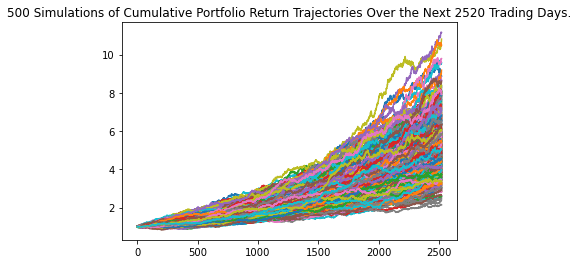

In [125]:
# Plot simulation outcomes
line_plot_10 = MC_even_dist_10.plot_simulation()

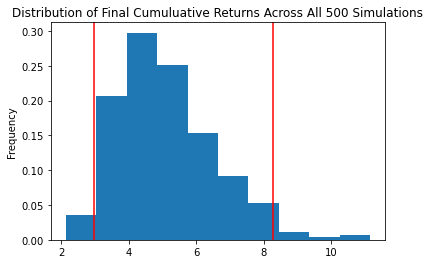

In [126]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_even_dist_10.plot_distribution()

In [127]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_1 = MC_even_dist_10.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              2.266297
std               0.403990
min               1.374607
25%               1.983532
50%               2.256121
75%               2.501449
max               4.240561
95% CI Lower      1.558219
95% CI Upper      3.026960
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
intial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")